In [844]:
import pandas as pd
import numpy as np
import re
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import networkx as nx

In [845]:
# Load the provided CSV file
file_path = "C:/Users\Ericm\PycharmProjects\wageData\.venv\Scripts\police_salaries.csv"
df = pd.read_csv(file_path, encoding='latin1')

df = df[~df['Name'].isin(['Not Provided', 'Redacted'])]

df['Total pay + benefits'] = df['Total pay'] + df['Benefits']

df

,Year,City,Name,Job title,Regular pay,Overtime pay,Other pay,Total pay,Benefits,Pension debt,Total pay & benefits,Total pay + benefits
0,2011,Carlsbad,"Morrison, Gary",Police Chief,172396.81,0.00,1239.92,173636.73,86156.48,NaN,259793.21,259793.21
1,2011,Carlsbad,"Eppel, Jarlath L.",Police Lieutenant,119550.57,46986.89,9666.26,176203.72,64488.01,NaN,240691.73,240691.73
2,2011,Carlsbad,"Magro, Mathew T.",Police Lieutenant,119550.63,37158.40,8559.26,165268.29,67547.19,NaN,232815.48,232815.48
3,2011,Carlsbad,"Gallucci, Aniello J.",Police Captain,145487.96,5595.69,1239.92,152323.57,75019.27,NaN,227342.84,227342.84
4,2011,Carlsbad,"Rowland, William A.",Police Captain,145487.94,5595.69,1239.92,152323.55,75019.23,NaN,227342.78,227342.78
...,...,...,...,...,...,...,...,...,...,...,...,...
43460,2023,San Diego,Ryan Allen,Police Officer Ii,0.00,0.00,1019.00,1019.00,0.00,NaN,1019.00,1019.00
43461,2023,San Diego,Michael Moore,Police Officer Ii,0.00,0.00,351.00,351.00,0.00,NaN,351.00,351.00
43462,2023,San Diego,Jorge Aguilar,Police Recruit,323.00,0.00,21.00,344.00,0.00,NaN,344.00,344.00
43463,2023,San Diego,Ariel del Toro,Police Officer Ii,0.00,0.00,18.00,18.00,0.00,NaN,18.00,18.00


In [846]:
#Adjust for inflation
cpi_df = pd.read_csv("C:/Users\Ericm\PycharmProjects\wageData\.venv\Scripts\SeriesReport-20240712171831_4c56aa.csv")
base_year_cpi = cpi_df['Annual'].iloc[3]
cpi_df['Inflation_index'] = 1 + (cpi_df['Annual'] - base_year_cpi) / base_year_cpi

cpi_df

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,HALF1,HALF2,Inflation_index
0,2008,211.080,211.693,213.528,214.823,216.632,218.815,219.964,219.086,218.783,216.573,212.425,210.228,215.303,214.429,216.177,0.957162
1,2009,211.143,212.193,212.709,213.240,213.856,215.693,215.351,215.834,215.969,216.177,216.330,215.949,214.537,213.139,215.935,0.953756
2,2010,216.687,216.741,217.631,218.009,218.178,217.965,218.011,218.312,218.439,218.711,218.803,219.179,218.056,217.535,218.576,0.969401
3,2011,220.223,221.309,223.467,224.906,225.964,225.722,225.922,226.545,226.889,226.421,226.230,225.672,224.939,223.598,226.280,1.000000
4,2012,226.665,227.663,229.392,230.085,229.815,229.478,229.104,230.379,231.407,231.317,230.221,229.601,229.594,228.850,230.338,1.020694
5,2013,230.280,232.166,232.773,232.531,232.945,233.504,233.596,233.877,234.149,233.546,233.069,233.049,232.957,232.366,233.548,1.035645
6,2014,233.916,234.781,236.293,237.072,237.900,238.343,238.250,237.852,238.031,237.433,236.151,234.812,236.736,236.384,237.088,1.052445
7,2015,233.707,234.722,236.119,236.599,237.805,238.638,238.654,238.316,237.945,237.838,237.336,236.525,237.017,236.265,237.769,1.053695
8,2016,236.916,237.111,238.132,239.261,240.229,241.018,240.628,240.849,241.428,241.729,241.353,241.432,240.007,238.778,241.237,1.066987
9,2017,242.839,243.603,243.801,244.524,244.733,244.955,244.786,245.519,246.819,246.663,246.669,246.524,245.120,244.076,246.163,1.089718


In [847]:
df = pd.merge(df, cpi_df[['Year', 'Inflation_index']],on='Year', how='left')

for column in df.columns[4:-1]:
    df[f'Adjusted {column.lower()}'] = df[column] / df['Inflation_index']
    
df

,Year,City,Name,Job title,Regular pay,Overtime pay,Other pay,Total pay,Benefits,Pension debt,...,Total pay + benefits,Inflation_index,Adjusted regular pay,Adjusted overtime pay,Adjusted other pay,Adjusted total pay,Adjusted benefits,Adjusted pension debt,Adjusted total pay & benefits,Adjusted total pay + benefits
0,2011,Carlsbad,"Morrison, Gary",Police Chief,172396.81,0.00,1239.92,173636.73,86156.48,NaN,...,259793.21,1.000000,172396.810000,0.00,1239.920000,173636.730000,86156.48,NaN,259793.210000,259793.210000
1,2011,Carlsbad,"Eppel, Jarlath L.",Police Lieutenant,119550.57,46986.89,9666.26,176203.72,64488.01,NaN,...,240691.73,1.000000,119550.570000,46986.89,9666.260000,176203.720000,64488.01,NaN,240691.730000,240691.730000
2,2011,Carlsbad,"Magro, Mathew T.",Police Lieutenant,119550.63,37158.40,8559.26,165268.29,67547.19,NaN,...,232815.48,1.000000,119550.630000,37158.40,8559.260000,165268.290000,67547.19,NaN,232815.480000,232815.480000
3,2011,Carlsbad,"Gallucci, Aniello J.",Police Captain,145487.96,5595.69,1239.92,152323.57,75019.27,NaN,...,227342.84,1.000000,145487.960000,5595.69,1239.920000,152323.570000,75019.27,NaN,227342.840000,227342.840000
4,2011,Carlsbad,"Rowland, William A.",Police Captain,145487.94,5595.69,1239.92,152323.55,75019.23,NaN,...,227342.78,1.000000,145487.940000,5595.69,1239.920000,152323.550000,75019.23,NaN,227342.780000,227342.780000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42956,2023,San Diego,Ryan Allen,Police Officer Ii,0.00,0.00,1019.00,1019.00,0.00,NaN,...,1019.00,1.354598,0.000000,0.00,752.252499,752.252499,0.00,NaN,752.252499,752.252499
42957,2023,San Diego,Michael Moore,Police Officer Ii,0.00,0.00,351.00,351.00,0.00,NaN,...,351.00,1.354598,0.000000,0.00,259.117397,259.117397,0.00,NaN,259.117397,259.117397
42958,2023,San Diego,Jorge Aguilar,Police Recruit,323.00,0.00,21.00,344.00,0.00,NaN,...,344.00,1.354598,238.447063,0.00,15.502750,253.949813,0.00,NaN,253.949813,253.949813
42959,2023,San Diego,Ariel del Toro,Police Officer Ii,0.00,0.00,18.00,18.00,0.00,NaN,...,18.00,1.354598,0.000000,0.00,13.288072,13.288072,0.00,NaN,13.288072,13.288072


In [848]:
'''# Define the keywords for positions to include and exclude
include_keywords = {}
include_keywords['Police'] = ['Police Officer', 'Police Detective', 'Police Agent', 'Police Corporal',
                    'Police Sergeant', 'Police Lieutenant', 'Police Captain', 'Police Chief', 'Chief of Police']
include_keywords['Police Officer'] = ['Police Officer']
include_keywords['Engineer'] = ['Engineer']
include_keywords['Fire'] = ['Fire']

exclude_keywords = {}
exclude_keywords['Police'] = ['Assistant', 'Secretary', 'Assist', 'Asst', 'Trainee', 'tied', 'Reserve', 'Temp', 'Security'
                                                                                                    'Terminal', 'Recruit']
exclude_keywords['Police Officer'] = ['Assistant', 'Secretary', 'Assist', 'Asst', 'Trainee', 'tied', 'Reserve', 'Temp', 'Security'
                                                                                                            'Terminal', 'Recruit']
exclude_keywords['Engineer'] = ['Assistant', 'Assist', 'Asst', 'Student', 'Aide', 'Fire']
exclude_keywords['Fire'] = ['Assistant', 'Assist', 'Asst', 'Volunteer', 'Student', 'Aide']

position = 'Police'

# Filter for positions that contain one of the include keywords
include_filter = df['Job title'].str.contains('|'.join(include_keywords[position]), case=False, na=False)

# Exclude positions containing the exclude keywords
exclude_filter = ~df['Job title'].str.contains('|'.join(exclude_keywords[position]), case=False, na=False)

# Apply both filters
filtered_df = df[include_filter]

#filtered_df.to_csv(f"C:/Users/Ericm\PycharmProjects\wageData\.venv\Scripts/{position}WageDataAdjusted.csv")

filtered_df'''

'# Define the keywords for positions to include and exclude\ninclude_keywords = {}\ninclude_keywords[\'Police\'] = [\'Police Officer\', \'Police Detective\', \'Police Agent\', \'Police Corporal\',\n                    \'Police Sergeant\', \'Police Lieutenant\', \'Police Captain\', \'Police Chief\', \'Chief of Police\']\ninclude_keywords[\'Police Officer\'] = [\'Police Officer\']\ninclude_keywords[\'Engineer\'] = [\'Engineer\']\ninclude_keywords[\'Fire\'] = [\'Fire\']\n\nexclude_keywords = {}\nexclude_keywords[\'Police\'] = [\'Assistant\', \'Secretary\', \'Assist\', \'Asst\', \'Trainee\', \'tied\', \'Reserve\', \'Temp\', \'Security\'\n                                                                                                    \'Terminal\', \'Recruit\']\nexclude_keywords[\'Police Officer\'] = [\'Assistant\', \'Secretary\', \'Assist\', \'Asst\', \'Trainee\', \'tied\', \'Reserve\', \'Temp\', \'Security\'\n                                                                              

In [849]:
def normalize_name(name):
    name = name.strip()
    
    # Check if the name is already in "Lastname, Firstname Middlename/Initial" format
    if "," in name:
        return name.title()  # Capitalize the entire string appropriately
    
    # Split the name into parts
    parts = name.split()
    
    if len(parts) == 1:
        # If there's only one part, it's just a last name, so we return it as is
        return name.title()
    
    if len(parts) == 2:
        # If there are two parts, assume it's "Firstname Lastname"
        firstname, lastname = parts
        return f"{lastname.title()}, {firstname.title()}"
    
    # If there are three or more parts
    firstname = parts[0].title()
    lastname = parts[-1].title()
    middle = " ".join([part.title() for part in parts[1:-1]])  # Capitalize each part of the middle names/initials
    return f"{lastname}, {firstname} {middle}"

df['Name'] = df['Name'].apply(normalize_name)

df

,Year,City,Name,Job title,Regular pay,Overtime pay,Other pay,Total pay,Benefits,Pension debt,...,Total pay + benefits,Inflation_index,Adjusted regular pay,Adjusted overtime pay,Adjusted other pay,Adjusted total pay,Adjusted benefits,Adjusted pension debt,Adjusted total pay & benefits,Adjusted total pay + benefits
0,2011,Carlsbad,"Morrison, Gary",Police Chief,172396.81,0.00,1239.92,173636.73,86156.48,NaN,...,259793.21,1.000000,172396.810000,0.00,1239.920000,173636.730000,86156.48,NaN,259793.210000,259793.210000
1,2011,Carlsbad,"Eppel, Jarlath L.",Police Lieutenant,119550.57,46986.89,9666.26,176203.72,64488.01,NaN,...,240691.73,1.000000,119550.570000,46986.89,9666.260000,176203.720000,64488.01,NaN,240691.730000,240691.730000
2,2011,Carlsbad,"Magro, Mathew T.",Police Lieutenant,119550.63,37158.40,8559.26,165268.29,67547.19,NaN,...,232815.48,1.000000,119550.630000,37158.40,8559.260000,165268.290000,67547.19,NaN,232815.480000,232815.480000
3,2011,Carlsbad,"Gallucci, Aniello J.",Police Captain,145487.96,5595.69,1239.92,152323.57,75019.27,NaN,...,227342.84,1.000000,145487.960000,5595.69,1239.920000,152323.570000,75019.27,NaN,227342.840000,227342.840000
4,2011,Carlsbad,"Rowland, William A.",Police Captain,145487.94,5595.69,1239.92,152323.55,75019.23,NaN,...,227342.78,1.000000,145487.940000,5595.69,1239.920000,152323.550000,75019.23,NaN,227342.780000,227342.780000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42956,2023,San Diego,"Allen, Ryan",Police Officer Ii,0.00,0.00,1019.00,1019.00,0.00,NaN,...,1019.00,1.354598,0.000000,0.00,752.252499,752.252499,0.00,NaN,752.252499,752.252499
42957,2023,San Diego,"Moore, Michael",Police Officer Ii,0.00,0.00,351.00,351.00,0.00,NaN,...,351.00,1.354598,0.000000,0.00,259.117397,259.117397,0.00,NaN,259.117397,259.117397
42958,2023,San Diego,"Aguilar, Jorge",Police Recruit,323.00,0.00,21.00,344.00,0.00,NaN,...,344.00,1.354598,238.447063,0.00,15.502750,253.949813,0.00,NaN,253.949813,253.949813
42959,2023,San Diego,"Toro, Ariel Del",Police Officer Ii,0.00,0.00,18.00,18.00,0.00,NaN,...,18.00,1.354598,0.000000,0.00,13.288072,13.288072,0.00,NaN,13.288072,13.288072


In [862]:
# Split the normalized names into 'Last', 'First', and 'Middle' components
df[['Last', 'First_Middle']] = df['Name'].str.split(', ', expand=True)
df[['First', 'Middle']] = df['First_Middle'].str.split(n=1, expand=True)

def remove_suffix(lastname):
    parts = lastname.split(' ')
    
    # List of common suffixes
    suffixes = ['Jr', 'Sr', 'I', 'II', 'III', 'IV', 'V']
    
    # Check if the last part of the lastname is a suffix and remove it
    if len(parts) > 1 and parts[-1].title() in suffixes:
        return " ".join(parts[:-1])  # Return the lastname without the suffix
    
    return lastname

# Function to handle conflicts with middle initials
def resolve_middle_names(group):
    if len(group) == 1:
        return group  # Only one name, nothing to change
    
    # Identify the different middle names
    unique_middle_names = group['Middle'].dropna().unique()
    
    if len(unique_middle_names) == 1:
        # If there's only one unique middle name, remove it
        group['Middle'] = ''
    
    return group

df['Last'] = df['Last'].apply(remove_suffix)

# Group by first and last name, and apply the function
df = df.groupby(['Last', 'First']).apply(resolve_middle_names).reset_index(drop=True)

# Reconstruct the full name with or without middle names
df['Name'] = df.apply(lambda x: f"{x['Last']}, {x['First']} {x['Middle']}".strip() if pd.notna(x['Middle']) and x['Middle'] else f"{x['Last']}, {x['First']}", axis=1)

# Drop temporary columns
df = df.drop(columns=['Last', 'First_Middle', 'First', 'Middle'])

#df.to_csv('C:/Users/Ericm/PycharmProjects/wageData/.venv/Scripts/police_salaries_cleaned.csv', index=False)

df

C:\Users\Ericm\AppData\Local\Temp\ipykernel_25048\49223395.py:34: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Year,City,Name,Job title,Regular pay,Overtime pay,Other pay,Total pay,Benefits,Pension debt,...,Total pay + benefits,Inflation_index,Adjusted regular pay,Adjusted overtime pay,Adjusted other pay,Adjusted total pay,Adjusted benefits,Adjusted pension debt,Adjusted total pay & benefits,Adjusted total pay + benefits
0,2020,Escondido,"6255, Gc",Police Sergeant,145998.0,17900.00,1711.00,165609.00,33352.00,240445.31,...,198961.00,1.150583,126890.449486,15557.329866,1487.072145,143934.851498,28987.042776,208976.927511,36055.033237,172921.894274
1,2020,Escondido,"6255, Gc",Police Officer,110080.0,43814.00,7093.00,160987.00,38629.00,233151.36,...,199616.00,1.150583,95673.233054,38079.824065,6164.700600,139917.757719,33573.413151,202637.576328,29146.405458,173491.170870
2,2020,Escondido,"6255, Gc",Police Sergeant,141048.0,9253.00,3654.00,153955.00,32191.00,225852.48,...,186146.00,1.150583,122588.282847,8042.009679,3175.781192,133806.073718,27977.989147,196293.940361,34509.877496,161784.062864
3,2020,Escondido,"6255, Gc",Police Officer,104113.0,27278.00,6709.00,138100.00,39959.00,214021.46,...,178059.00,1.150583,90487.166724,23707.980117,5830.956764,120026.103605,34729.348834,186011.310149,31255.857711,154755.452438
4,2020,Escondido,"6255, Gc",Police Officer,111949.0,30590.00,1333.00,143872.00,37753.00,213818.95,...,181625.00,1.150583,97297.626882,26586.520704,1158.543057,125042.690643,32812.060024,185835.303731,27980.553064,157854.750667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42828,2018,San Diego,"Zwibel, Edward",Police Officer,94485.0,21568.00,32027.00,148080.00,34958.00,NaN,...,183038.00,1.116334,84638.665649,19320.386736,28689.448534,132648.500918,31315.007395,NaN,163963.508313,163963.508313
42829,2019,San Diego,"Zwibel, Edward",Police Officer,107707.0,20943.00,17694.00,146344.00,39288.00,NaN,...,185632.00,1.136561,94765.662090,18426.632077,15568.009740,128760.303907,34567.422101,NaN,163327.726008,163327.726008
42830,2020,San Diego,"Zwibel, Edward",Police Officer,113148.0,27002.00,17039.00,157189.00,38956.00,NaN,...,196145.00,1.150583,98339.707246,23468.101734,14809.013608,136616.822589,33857.616886,NaN,170474.439475,170474.439475
42831,2021,San Diego,"Zwibel, Edward",Police Officer,117471.0,8854.00,20546.00,146871.00,40919.00,321562.68,...,187790.00,1.204638,97515.626339,7349.927689,17055.750430,121921.304458,33967.889217,266937.253853,111048.060178,155889.193675


In [851]:
df['Name'].unique()

array(['6255, Gc', 'A.M., Magan Worth', 'Aaland, Erin', ...,
       'Zuniga, Gerardo', 'Zweifach, Richard', 'Zwibel, Edward'],
      dtype=object)

In [863]:
# Sort by Name and Year to ensure we can track movements sequentially
df = df.sort_values(by=['Name', 'Year'])

# List to store names that meet the criteria
selected_names = set()

# Group by Name to analyze movements and pay changes
for name, group in df.groupby('Name'):
    # Sort the group by Year to track movements sequentially
    group = group.sort_values(by='Year')
    
    # Track the previous city and average total pay
    prev_city = None
    prev_avg_pay = None
    
    for i, row in group.iterrows():
        current_city = row['City']
        current_total_pay = row['Adjusted total pay + benefits']  # Adjust column name as per the actual data

        # If the city changes and it's not the first city, calculate the averages
        if prev_city is not None and current_city != prev_city:
            # Calculate the average pay in the current and previous cities
            prev_city_avg_pay = group[group['City'] == prev_city]['Adjusted total pay + benefits'].mean()
            current_city_avg_pay = group[group['City'] == current_city]['Adjusted total pay + benefits'].mean()
            
            # Add the name to the set if the average pay in the new city is higher than in the previous city
            if current_city_avg_pay > prev_city_avg_pay:
                selected_names.add(name)
        
        # Update the previous city and total pay for the next iteration
        prev_city = current_city

# Filter the original DataFrame to include all entries for the selected names
filtered_movements_df = df[df['Name'].isin(selected_names)]

print(filtered_movements_df['Name'].nunique())

#filtered_movements_df.to_csv('C:/Users/Ericm/PycharmProjects/wageData/.venv/Scripts/police_salaries_movements.csv')

filtered_movements_df

98


,Year,City,Name,Job title,Regular pay,Overtime pay,Other pay,Total pay,Benefits,Pension debt,...,Total pay + benefits,Inflation_index,Adjusted regular pay,Adjusted overtime pay,Adjusted other pay,Adjusted total pay,Adjusted benefits,Adjusted pension debt,Adjusted total pay & benefits,Adjusted total pay + benefits
216,2013,National City,"Adams, Danielle",Police Officer,82256.0,5126.00,2317.00,89699.00,37433.00,NaN,...,127132.00,1.035645,79424.882635,4949.571440,2237.252639,86611.706714,36144.617191,NaN,122756.323905,122756.323905
217,2014,National City,"Adams, Danielle",Police Officer,78878.0,74.00,3516.00,82468.00,39294.00,NaN,...,121762.00,1.052445,74947.360951,70.312441,3340.791109,78358.464501,37335.906098,NaN,115694.370598,115694.370598
218,2015,National City,"Adams, Danielle",Police Officer,76873.0,6357.00,3520.00,86750.00,44727.00,NaN,...,131477.00,1.053695,72955.677217,6033.057641,3340.626537,82329.361396,42447.784982,NaN,124777.146378,124777.146378
219,2016,National City,"Adams, Danielle",Police Officer,81055.0,7580.00,4425.00,93060.00,54718.00,NaN,...,147778.00,1.066987,75966.245339,7104.116213,4147.191853,87217.553405,51282.721762,NaN,138500.275167,138500.275167
220,2017,National City,"Adams, Danielle",Police Officer,79920.0,8048.00,10226.00,98194.00,46306.00,158288.32,...,144500.00,1.089718,73340.098238,7385.399282,9384.082139,90109.579659,42493.575938,145256.268001,12653.112404,132603.155597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40526,2019,San Diego,"Webb, Kyle",Police Officer,63529.0,11177.00,9220.00,83926.00,18760.00,NaN,...,102686.00,1.136561,55895.789010,9834.047974,8112.187736,73842.024721,16505.926456,NaN,90347.951177,90347.951177
40527,2020,San Diego,"Webb, Kyle",Police Officer,73501.0,14644.00,8925.00,97070.00,21251.00,NaN,...,118321.00,1.150583,63881.525279,12727.460255,7756.936819,84365.922353,18469.766312,NaN,102835.688665,102835.688665
40528,2021,San Diego,"Webb, Kyle",Police Officer,90042.0,18223.00,4425.00,112690.00,24383.00,229434.76,...,137073.00,1.204638,74746.124803,15127.369808,3673.303594,93546.798206,20240.940462,190459.554488,76671.815820,113787.738668
40529,2022,San Diego,"Webb, Kyle",Police Officer Ii,33213.6,7546.88,3191.80,43952.28,8364.61,79838.66,...,52316.89,1.301042,25528.468574,5800.644583,2453.265108,33782.378264,6429.164063,61365.185429,21153.643102,40211.542327


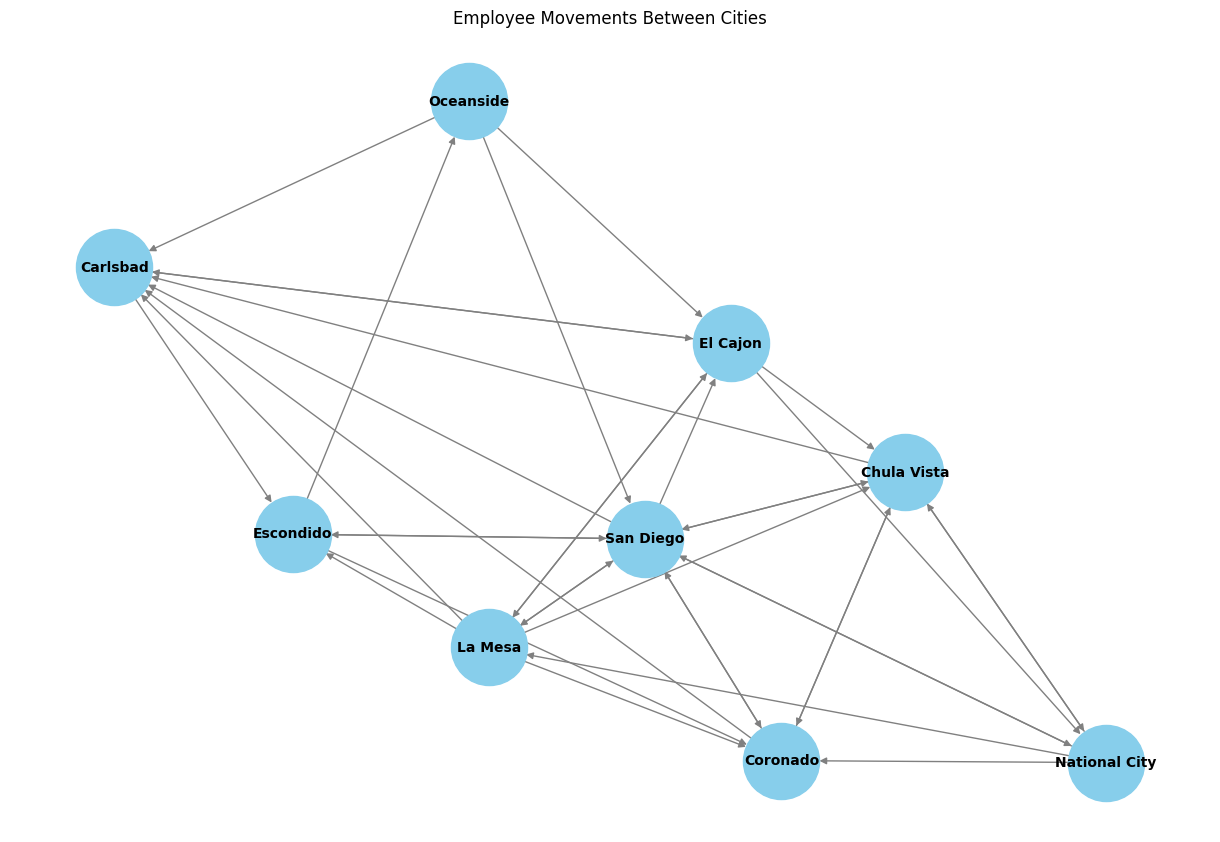

In [853]:
# Create an empty directed graph
G = nx.DiGraph()

# Add edges between cities for each individual who has worked in multiple cities
for name, group in filtered_movements_df.groupby('Name'):
    cities = group['City'].unique()
    if len(cities) > 1:
        for i in range(len(cities) - 1):
            G.add_edge(cities[i], cities[i + 1])

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # For consistent layout
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold', edge_color='gray')
plt.title("Employee Movements Between Cities")
plt.show()


In [854]:
df['Job title'].unique()

array(['Police Sergeant', 'Police Officer', 'Police Dispatcher',
       'Police Officer Ii', 'Police Recruit', 'Police Officer 1',
       'Police Corporal', 'Police Detective', 'Police Records Clerk',
       'Police Officer 2', 'Police Services Specialist',
       'POLICE SRVS SPECIALIST', 'Police Chief', 'POLICE CHIEF',
       'POLICE CHIEF-TEMP', 'Interim Director Of Police Services',
       'Police Officer I', 'Senior Police Dispatcher', 'Police  Officer',
       'Police Services Officer', 'Police Cadet', 'POLICE AGENT',
       'POLICE SERGEANT', 'Police Lieutenant', 'Police Officer Trainee',
       'Police Captain', 'Assistant Police Chief',
       'POLICE ADMIN SVCS ADMINISTRATO', 'Police Admin Srvcs Admnstrtr',
       'Police Admin Svcs Administratr',
       'Confidential Secretary to Police Chief',
       'Conf Secretary to Police Chief',
       'Police Property And Evidence Specialist',
       'Police Records Specialist', 'Police Invstgtv Serv Ofcr 1',
       'Police Officer 5%

In [855]:
df['City'].unique()

array(['Escondido', 'San Diego', 'La Mesa', 'Carlsbad', 'Oceanside',
       'National City', 'Coronado', 'Chula Vista', 'El Cajon'],
      dtype=object)

In [856]:
'''filtered_df.loc[filtered_df['Job title'].str.contains(position, case=False, na=False), 'Job title'] = position
filtered_df['Job title'].unique()'''

"filtered_df.loc[filtered_df['Job title'].str.contains(position, case=False, na=False), 'Job title'] = position\nfiltered_df['Job title'].unique()"

In [857]:
grouped_filtered_df = df.groupby(['Year', 'City']).agg(
    PositionCount=('Job title', 'size'),
    MedianTotalWages=('Adjusted total pay + benefits', 'median')
).reset_index()

grouped_filtered_df.columns = ['Year', 'City', 'NumEmpls', 'AdjMedianTotWage']
grouped_filtered_df

,Year,City,NumEmpls,AdjMedianTotWage
0,2011,Carlsbad,125,145497.580000
1,2011,Coronado,59,136365.000000
2,2011,El Cajon,156,115526.365000
3,2011,Escondido,166,129387.315000
4,2011,La Mesa,90,122723.490000
...,...,...,...,...
106,2023,Coronado,73,122859.517025
107,2023,El Cajon,173,122976.496349
108,2023,Escondido,165,122547.764101
109,2023,Oceanside,242,132571.030349


In [858]:

grouped_filtered_df['NumEmpls%Chg'] = grouped_filtered_df.groupby(['City'])['NumEmpls'].pct_change()
grouped_filtered_df['AdjMedianTotWage%Chg'] = grouped_filtered_df.groupby(['City'])['AdjMedianTotWage'].pct_change()

#grouped_filtered_df.to_csv(f"C:/Users/Ericm\PycharmProjects\wageData\.venv\Scripts/{position}_RoC.csv")

grouped_filtered_df

,Year,City,NumEmpls,AdjMedianTotWage,NumEmpls%Chg,AdjMedianTotWage%Chg
0,2011,Carlsbad,125,145497.580000,NaN,NaN
1,2011,Coronado,59,136365.000000,NaN,NaN
2,2011,El Cajon,156,115526.365000,NaN,NaN
3,2011,Escondido,166,129387.315000,NaN,NaN
4,2011,La Mesa,90,122723.490000,NaN,NaN
...,...,...,...,...,...,...
106,2023,Coronado,73,122859.517025,0.000000,0.033965
107,2023,El Cajon,173,122976.496349,0.061350,0.106514
108,2023,Escondido,165,122547.764101,-0.093407,0.016174
109,2023,Oceanside,242,132571.030349,-0.016260,-0.001508


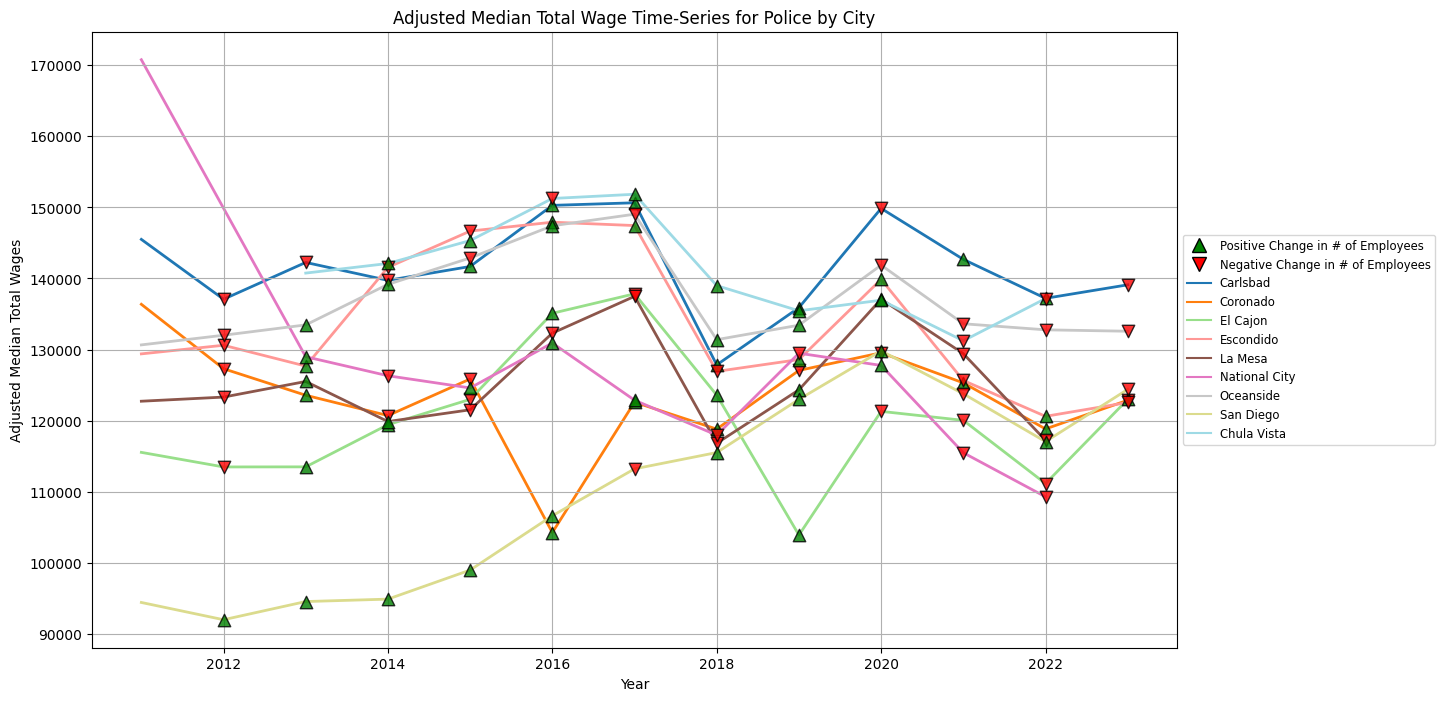

In [859]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# If position is not null, filter for that position only
def plot_wage_timeseries(df, position, filter, save_path=None):
    # Convert columns to appropriate types
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
    df['NumEmpls%Chg'] = pd.to_numeric(df['NumEmpls%Chg'], errors='coerce')
    df['AdjMedianTotWage'] = pd.to_numeric(df['AdjMedianTotWage'], errors='coerce')
    
    # Filter by position if provided
    if filter:
        df = df[df['Job title'] == filter]
    
    # Get a list of cities in the dataset
    cities = df['City'].unique()
    
    # Use a distinct color map that can generate unique colors for each city
    num_cities = len(cities)
    cmap = plt.get_cmap('tab20', num_cities)  # 'tab20' is good for categorical data with many distinct colors
    
    # Plotting
    plt.figure(figsize=(14, 8))

    city_colors = {}

    for i, city in enumerate(cities):
        city_data = df[df['City'] == city]
        
        # Separate the data into positive and negative employee change
        positive_change = city_data[city_data['NumEmpls%Chg'] > 0]
        negative_change = city_data[city_data['NumEmpls%Chg'] <= 0]
        
        # Assign and store a unique color for each city from the colormap
        color = cmap(i)
        city_colors[city] = color
        
        # Plot time-series for the city without markers on the line
        plt.plot(city_data['Year'], city_data['AdjMedianTotWage'], label=city, color=color, linestyle='-', linewidth=2, zorder=1)
        
        # Overlay smaller markers for positive and negative employee changes with higher zorder
        plt.scatter(positive_change['Year'], positive_change['AdjMedianTotWage'], 
                    color='green', marker='^', s=80, edgecolor='black', alpha=0.8, zorder=2)
        plt.scatter(negative_change['Year'], negative_change['AdjMedianTotWage'], 
                    color='red', marker='v', s=80, edgecolor='black', alpha=0.8, zorder=2)
    
    plt.title(f'Adjusted Median Total Wage Time-Series for {position} by City')
    plt.xlabel('Year')
    plt.ylabel('Adjusted Median Total Wages')
    
    # Create custom handles for the legend to only show one instance of the markers
    custom_handles = [
        plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='green', markersize=10, label='Positive Change in # of Employees', markeredgecolor='black'),
        plt.Line2D([0], [0], marker='v', color='w', markerfacecolor='red', markersize=10, label='Negative Change in # of Employees', markeredgecolor='black')
    ]
    
    # Add city-specific handles with unique colors
    city_handles = [plt.Line2D([0], [0], color=city_colors[city], label=city) for city in cities]
    
    plt.legend(handles=custom_handles + city_handles, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
    
    plt.grid(True)
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')  # Use bbox_inches='tight' to avoid cutting off the legend
        
    plt.show()

# Example usage with your DataFrame
plot_wage_timeseries(grouped_filtered_df, position=position, filter = None, save_path=f"C:/Users\Ericm\PycharmProjects\wageData\.venv\Scripts/{position.replace(' ', '')}WagesNumEmployeesViz.pdf")

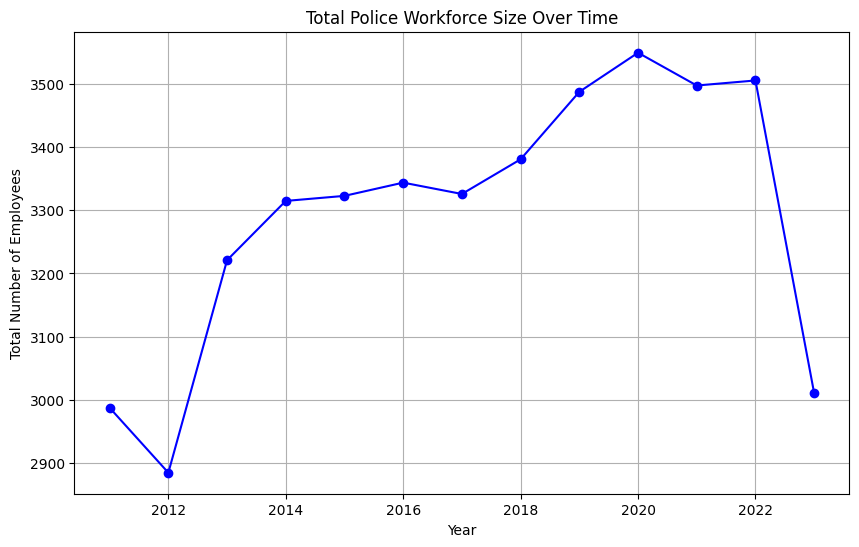

In [860]:
# Calculate the total number of employees for each year
total_workforce_new = grouped_filtered_df.groupby('Year')['NumEmpls'].sum()

# Plot the time-series of total workforce size
plt.figure(figsize=(10, 6))
plt.plot(total_workforce_new.index, total_workforce_new.values, marker='o', linestyle='-', color='b')
plt.title(f'Total {position} Workforce Size Over Time')
plt.xlabel('Year')
plt.ylabel('Total Number of Employees')
plt.grid(True)
plt.savefig(f"C:/Users\Ericm\PycharmProjects\wageData\.venv\Scripts/{position.replace(' ', '')}NumEmployeesViz.pdf")
plt.show()

In [861]:
import pandas as pd
import statsmodels.api as sm

# Convert 'City' to numeric codes if necessary
grouped_filtered_df['City'] = grouped_filtered_df['City'].astype('category').cat.codes
grouped_filtered_df['Year'] = pd.to_numeric(grouped_filtered_df['Year'])

# Create a lagged variable for NumEmpls%Chg by shifting it by 1 year within each city
#grouped_filtered_df['NumEmpls%Chg_Lagged'] = grouped_filtered_df.groupby('City')['NumEmpls%Chg'].shift(1)

# Define the dependent variable
y = pd.to_numeric(grouped_filtered_df['AdjMedianTotWage%Chg'], errors='coerce')

# Define the independent variables
X = grouped_filtered_df[['City', 'Year', 'NumEmpls%Chg']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Drop missing values that resulted from the lagging operation
X = X.dropna()
y = y[X.index]

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     AdjMedianTotWage%Chg   R-squared:                       0.051
Model:                              OLS   Adj. R-squared:                  0.022
Method:                   Least Squares   F-statistic:                     1.758
Date:                  Mon, 19 Aug 2024   Prob (F-statistic):              0.160
Time:                          19:56:52   Log-Likelihood:                 129.27
No. Observations:                   102   AIC:                            -250.5
Df Residuals:                        98   BIC:                            -240.0
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.2798     